## Mendelian Randomization Exercise: LDL and Coronary Artery Disease (CAD)
This exercise aims to guide you through a practical Mendelian Randomization (MR) analysis using a pre-harmonised dataset focusing on the causal relationship between LDL cholesterol levels and Coronary Artery Disease (CAD). You will learn to perform MR analysis, identify potential assumption violations using diagnostic plots and statistical tests, and interpret the results from different MR methods.

Objective: To determine if LDL cholesterol is a causal risk factor for CAD using Mendelian Randomization.


In [1]:
library(TwoSampleMR)
library(dplyr)
library(ggplot2)

TwoSampleMR version 0.6.18 


  [>] New authentication requirements: https://mrcieu.github.io/ieugwasr/articles/guide.html#authentication.

  [>] Major upgrades to our servers completed to improve service and stability.

  [>] We need your help to shape our emerging roadmap!

      Please take 2 minutes to give us feedback -

      https://forms.office.com/e/eSr7EFAfCG


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#Read the harmonised and clumped data
ldl_cad_fil <- readRDS("data/LDL_CAD_excercise_data.rds")

In [3]:
# Display the first few rows of the harmonised data to understand its structure
head(ldl_cad_fil)

,SNP,effect_allele.exposure,other_allele.exposure,beta.exposure,beta.outcome,se.exposure,se.outcome,pval.exposure,pval.outcome,id.exposure,id.outcome,mr_keep,exposure,outcome,effect_allele.outcome,other_allele.outcome
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
1,rs10028494,C,A,-0.006442778,-0.0003204453,0.001109231,0.002329332,6.31e-09,0.8905806,nIf6qv,i6w0FI,TRUE,LDL,CAD,C,A
2,rs10107182,C,T,0.019927066,0.0002758071,0.001089979,0.002329332,1.15e-74,0.9057459,nIf6qv,i6w0FI,TRUE,LDL,CAD,C,T
3,rs1012167,C,T,-0.019026912,-0.0053744893,0.001098569,0.002329332,3.34e-67,0.0210376,nIf6qv,i6w0FI,TRUE,LDL,CAD,C,T
4,rs10132688,C,T,-0.006130377,-0.0026853398,0.001089390,0.002329332,1.83e-08,0.2489774,nIf6qv,i6w0FI,TRUE,LDL,CAD,C,T
5,rs10134376,C,T,-0.011644422,-0.0004357142,0.001096318,0.002329332,2.37e-26,0.8516172,nIf6qv,i6w0FI,TRUE,LDL,CAD,C,T
6,rs10184376,T,C,-0.009532938,-0.0036223579,0.001089389,0.002329332,2.12e-18,0.1199209,nIf6qv,i6w0FI,TRUE,LDL,CAD,T,C


In [4]:
# Positive allele coding for exposure beta
ldl_cad_fil <- ldl_cad_fil %>%
  mutate(
    beta.outcome  = ifelse(beta.exposure < 0, -beta.outcome, beta.outcome),
    beta.exposure = abs(beta.exposure)
  )

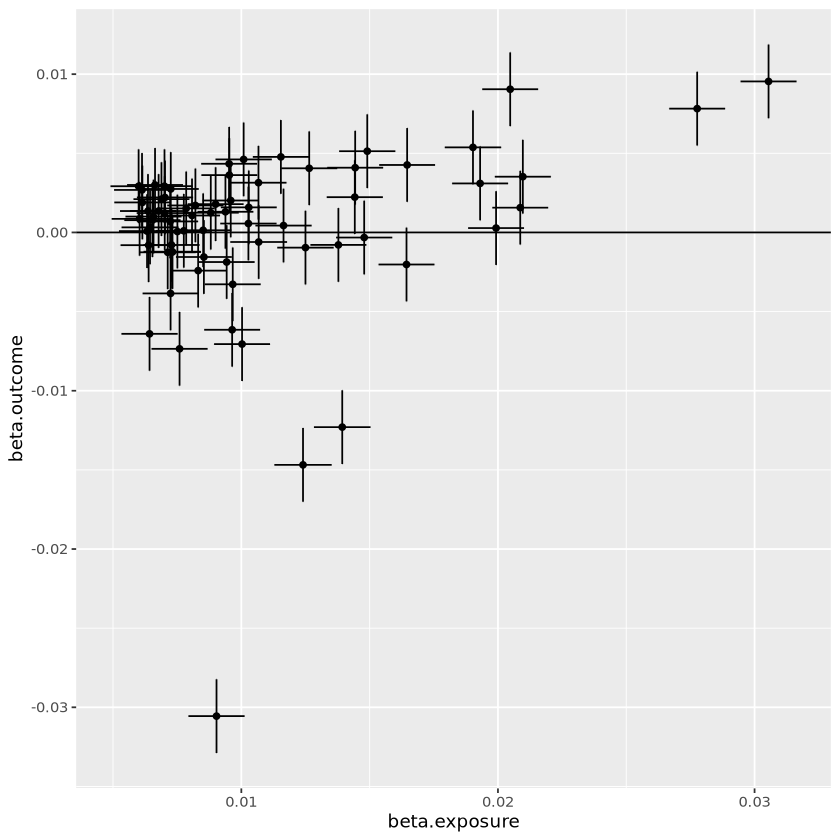

In [5]:
# Plot exposure and outcome effects 
ggplot(ldl_cad_fil, aes( x = beta.exposure, y = beta.outcome)) +
  geom_point() +
  geom_errorbar(aes(ymin = beta.outcome - se.outcome, ymax = beta.outcome + se.outcome)) +
  geom_errorbar(aes(xmin = beta.exposure - se.exposure, xmax = beta.exposure + se.exposure)) +
  geom_hline(yintercept = 0) 

## Part 1:  Assessing Heterogeneity (Forest Plot)
The forest plot of individual SNP effects helps visualize the consistency of the causal estimates from each genetic variant.

$nIf6qv.i6w0FI


Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_errorbarh()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."



attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1      nIf6qv     i6w0FI


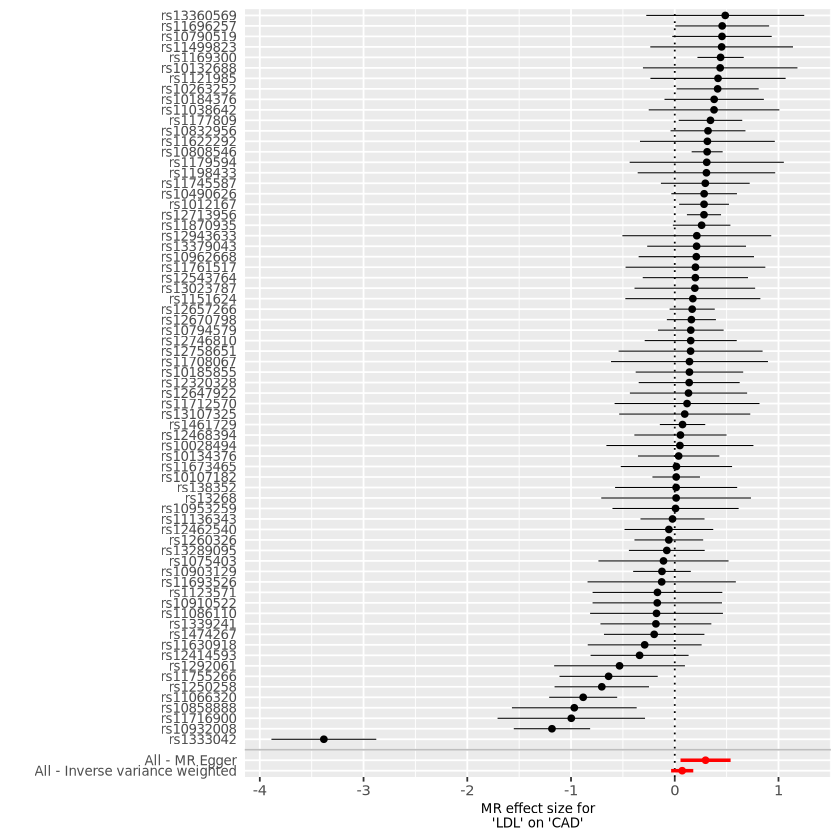

In [6]:
# Calculate single SNP effects
mr_singlesnp <- mr_singlesnp(ldl_cad_fil)

# Generate and print the forest plot for single SNP effects
p_singlesnp_forest <- mr_forest_plot(mr_singlesnp)
print(p_singlesnp_forest)

## Part 1: Assessing Heterogeneity with Heterogeneity Test
Heterogeneity refers to the variation in the causal estimates across different genetic variants. Significant heterogeneity can indicate violations of the core MR assumptions.

In [7]:
# Perform heterogeneity test
het <- mr_heterogeneity(ldl_cad_fil)

# Print heterogeneity results
print(het)

  id.exposure id.outcome outcome exposure                    method        Q
1      nIf6qv     i6w0FI     CAD      LDL                  MR Egger 350.9732
2      nIf6qv     i6w0FI     CAD      LDL Inverse variance weighted 372.2231
  Q_df       Q_pval
1   68 9.960582e-40
2   69 3.916740e-43


### Questions for Part 1:
Examine the forest plot of individual SNP effects. Do all SNPs show effects in the same direction? Do the confidence intervals largely overlap?

What does the spread or consistency of these individual SNP effects tell you about potential heterogeneity in our analysis?

How might significant heterogeneity affect the validity or interpretation of the Inverse Variance Weighted (IVW) method?

## Part 2: Investigating Pleiotropy with the Funnel Plot
The funnel plot helps to visually inspect for directional pleiotropy, which occurs when genetic variants affect the outcome through pathways other than the exposure.

$nIf6qv.i6w0FI

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1      nIf6qv     i6w0FI


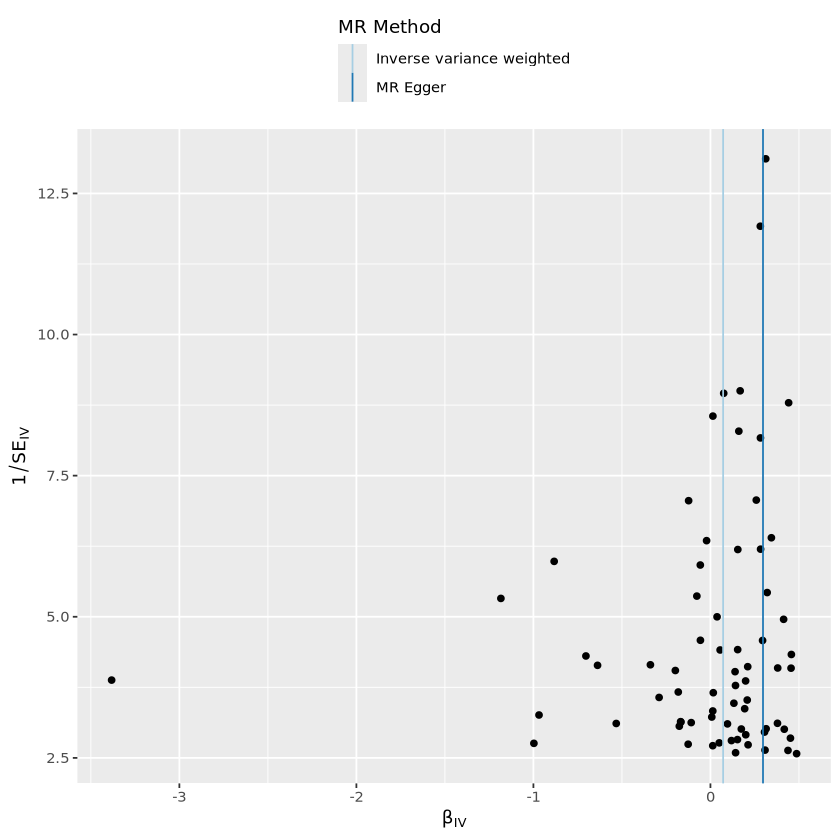

In [8]:
p_funnel <- mr_funnel_plot(mr_singlesnp)
print(p_funnel)

### Questions for Part 2:
Describe the shape of the funnel plot. Does it appear symmetrical? What might asymmetry indicate?

Based on the visual evidence from the funnel plot, do you suspect the presence of directional pleiotropy? Why or why not?

## Part 3: Quantifying Pleiotropy with MR Egger Intercept
The MR Egger intercept test provides a statistical test for directional pleiotropy. A significant intercept suggests pleiotropy.

  id.exposure id.outcome outcome exposure egger_intercept          se
1      nIf6qv     i6w0FI     CAD      LDL    -0.002963874 0.001460707
        pval
1 0.04636861


Analysing 'nIf6qv' on 'i6w0FI'



$nIf6qv.i6w0FI

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1      nIf6qv     i6w0FI


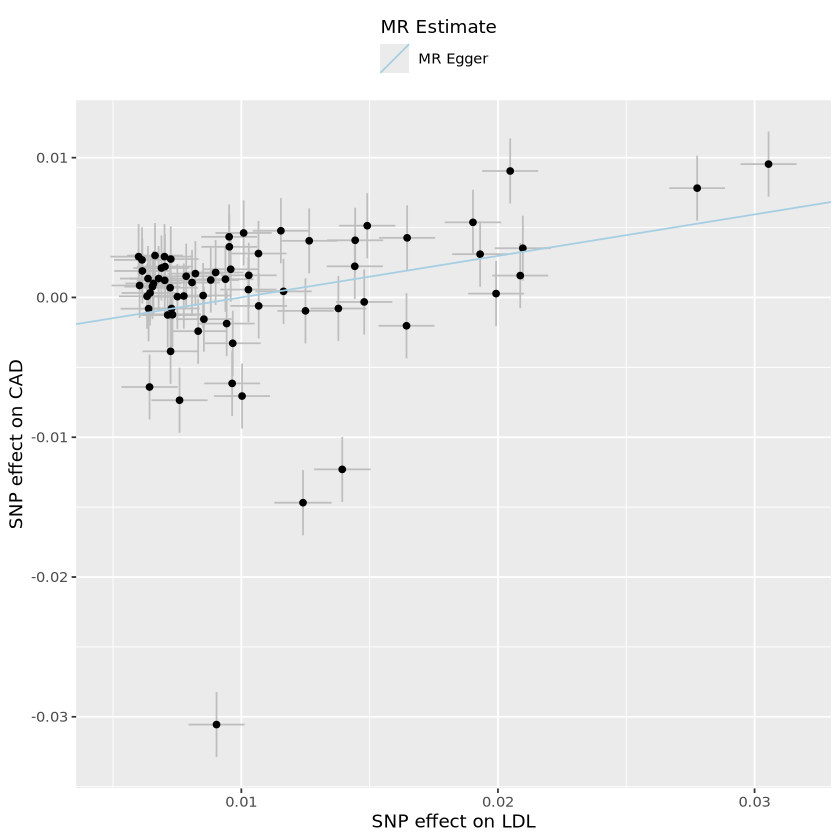

In [9]:
# Pleiotropy test
mr_pleio <- mr_pleiotropy_test(ldl_cad_fil)
print(mr_pleio)
# Generate and print the scatter plot
mr_results <- mr(ldl_cad_fil, method_list = c("mr_egger_regression"))
p_scatter <- mr_scatter_plot(mr_results, ldl_cad_fil)
print(p_scatter)


### Questions for Part 3:
Interpret the egger_intercept value and its corresponding p-value. What does this statistically tell you about the presence of directional pleiotropy?

Given the heterogeneity and pleiotropy test results, which MR method do you think would be appropriate, and why?


## Part 4: Performing MR Analysis
Let's perform MR analysis using Inverse Variance Weighted (IVW) and MR Egger.

In [10]:
# Perform MR analysis using specified methods
mr_results <- mr(ldl_cad_fil, method_list = c("mr_ivw", "mr_egger_regression"))

# Print the MR results
print(mr_results)

Analysing 'nIf6qv' on 'i6w0FI'



  id.exposure id.outcome outcome exposure                    method nsnp
1      nIf6qv     i6w0FI     CAD      LDL Inverse variance weighted   70
2      nIf6qv     i6w0FI     CAD      LDL                  MR Egger   70
           b         se       pval
1 0.07164931 0.05452809 0.18884991
2 0.29693416 0.12317540 0.01863232


### Questions for Part 4:
What do you observe? Are these results consistent with the observations we had before?


## Part 5: Leave-One-Out Analysis
The leave-one-out analysis identifies individual SNPs that might be disproportionately influencing the overall causal estimate.

$nIf6qv.i6w0FI


Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_errorbarh()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."



attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1      nIf6qv     i6w0FI


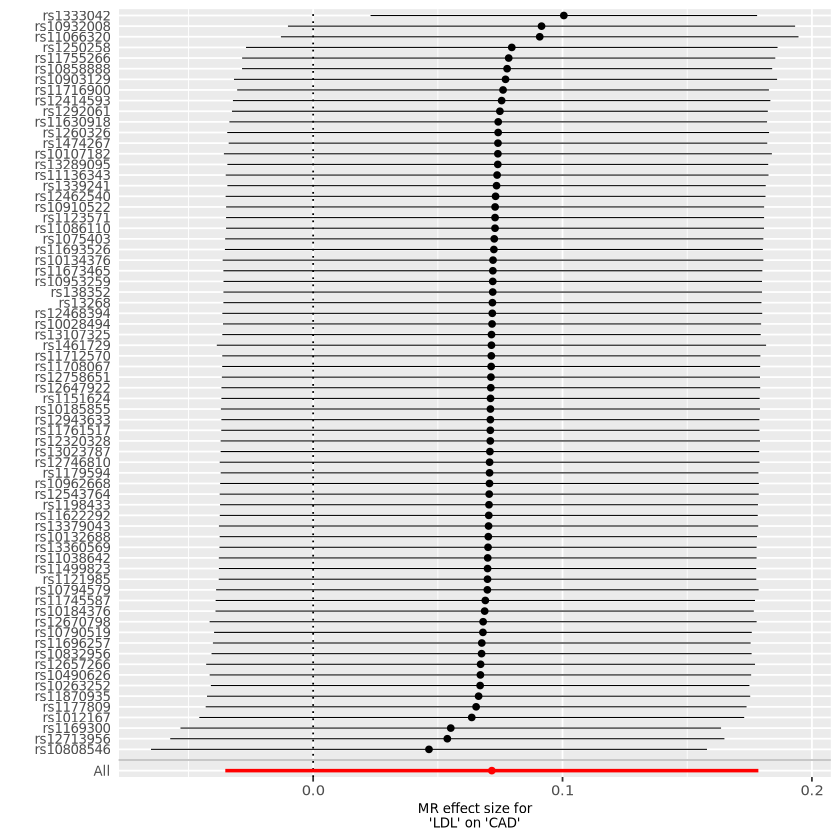

In [11]:
# Perform leave-one-out analysis
mr_loo <- mr_leaveoneout(ldl_cad_fil)

# Generate and print the forest plot for leave-one-out analysis
# This plot shows the overall MR estimate when each SNP is left out
p_loo_forest <- mr_forest_plot(mr_loo)
print(p_loo_forest)

From the provided leave-one-out forest plot, most SNPs show a consistent MR effect size for LDL on CAD when each is left out, as indicated by the tight clustering of points around the main effect estimate. However, a few SNPs at the top and bottom of the plot (such as rs1333002, rs10932048, rs1106620, rs10808546, and rs12713950) show that their removal causes a more noticeable shift in the overall MR effect size compared to the others.

These SNPs may be influential or outliers. You should consider:

Investigating these SNPs for potential pleiotropy or data quality issues.
Assessing if the overall conclusion changes when these SNPs are excluded.
Reporting their influence in your results and considering robust MR methods (like weighted median or MR-PRESSO) if sensitivity to individual SNPs is high.
In summary, focus on the SNPs at the extremes of the plot, as their removal has the largest effect on the MR estimate.

### Questions for Part 5:
Examine the leave-one-out plot. Are there any individual SNPs whose removal substantially changes the overall causal effect estimate?

What could be the implications of an influential SNP in an MR analysis, and what steps might you consider if you identify one?

Would there be another method more appropriate incase there is heterogeneity or presence of influential SNP?

Analysing 'nIf6qv' on 'i6w0FI'



  id.exposure id.outcome outcome exposure                    method nsnp
1      nIf6qv     i6w0FI     CAD      LDL Inverse variance weighted   70
2      nIf6qv     i6w0FI     CAD      LDL                  MR Egger   70
3      nIf6qv     i6w0FI     CAD      LDL           Weighted median   70
           b         se         pval
1 0.07164931 0.05452809 1.888499e-01
2 0.29693416 0.12317540 1.863232e-02
3 0.16795743 0.03874686 1.459348e-05
$nIf6qv.i6w0FI

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1      nIf6qv     i6w0FI


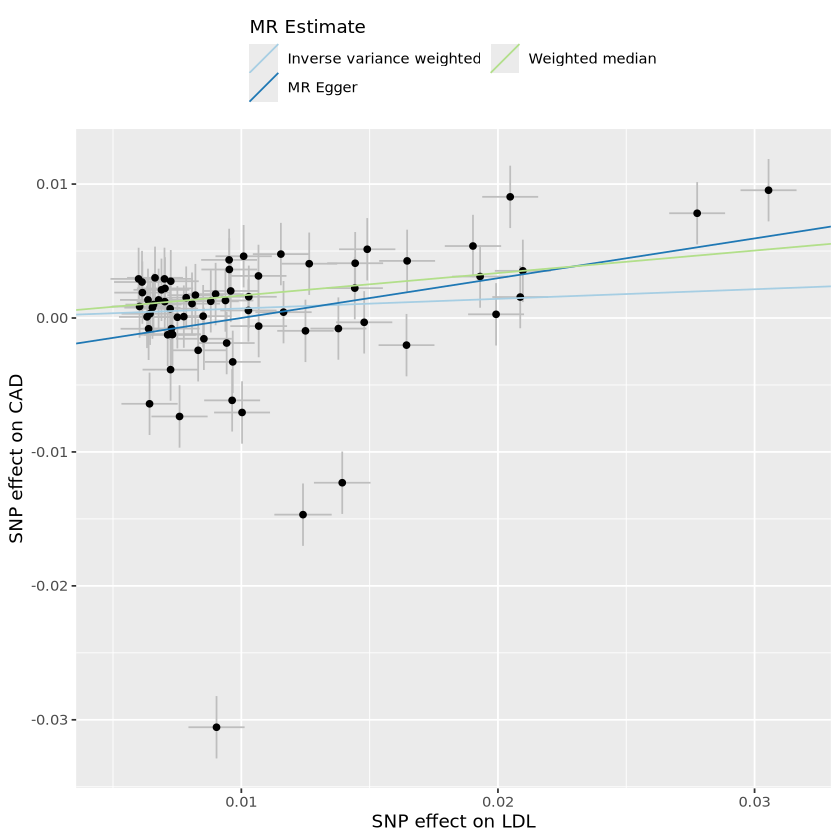

In [12]:
# Generate and print the scatter plot
mr_results <- mr(ldl_cad_fil, method_list = c("mr_ivw", "mr_egger_regression", "mr_weighted_median"))
print(mr_results)
p_scatter <- mr_scatter_plot(mr_results, ldl_cad_fil)
print(p_scatter)